In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
wine = datasets.load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
data_wine = wine['data']

In [5]:
data_wine.shape

(178, 13)

In [48]:
type(data_wine)

numpy.ndarray

In [6]:
target_wine = wine['target']

In [7]:
target_wine.shape

(178,)

In [ ]:
print(wine['DESCR'])

In [23]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
print(target_wine)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [31]:
color_list = []
for t, target in enumerate(target_wine): 
    if target_wine[t] == 0:
        color_list.append("pink")
    elif target_wine[t] == 1:
        color_list.append("skyblue")
    elif target_wine[t] == 2:
        color_list.append("lightgreen")

Text(0, 0.5, 'od280/od315_of_diluted_wines')

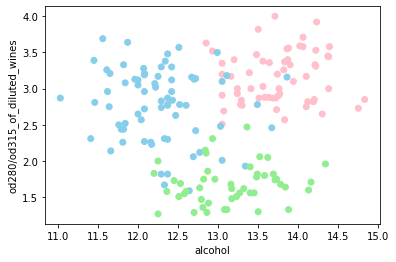

In [32]:
plt.scatter(data_wine[:,0], data_wine[:,11], c = color_list)
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[11])

In [39]:
wine_df = pd.DataFrame(data_wine, columns = wine.feature_names)
wine_df = wine_df.assign(alcohol_type = wine.target)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


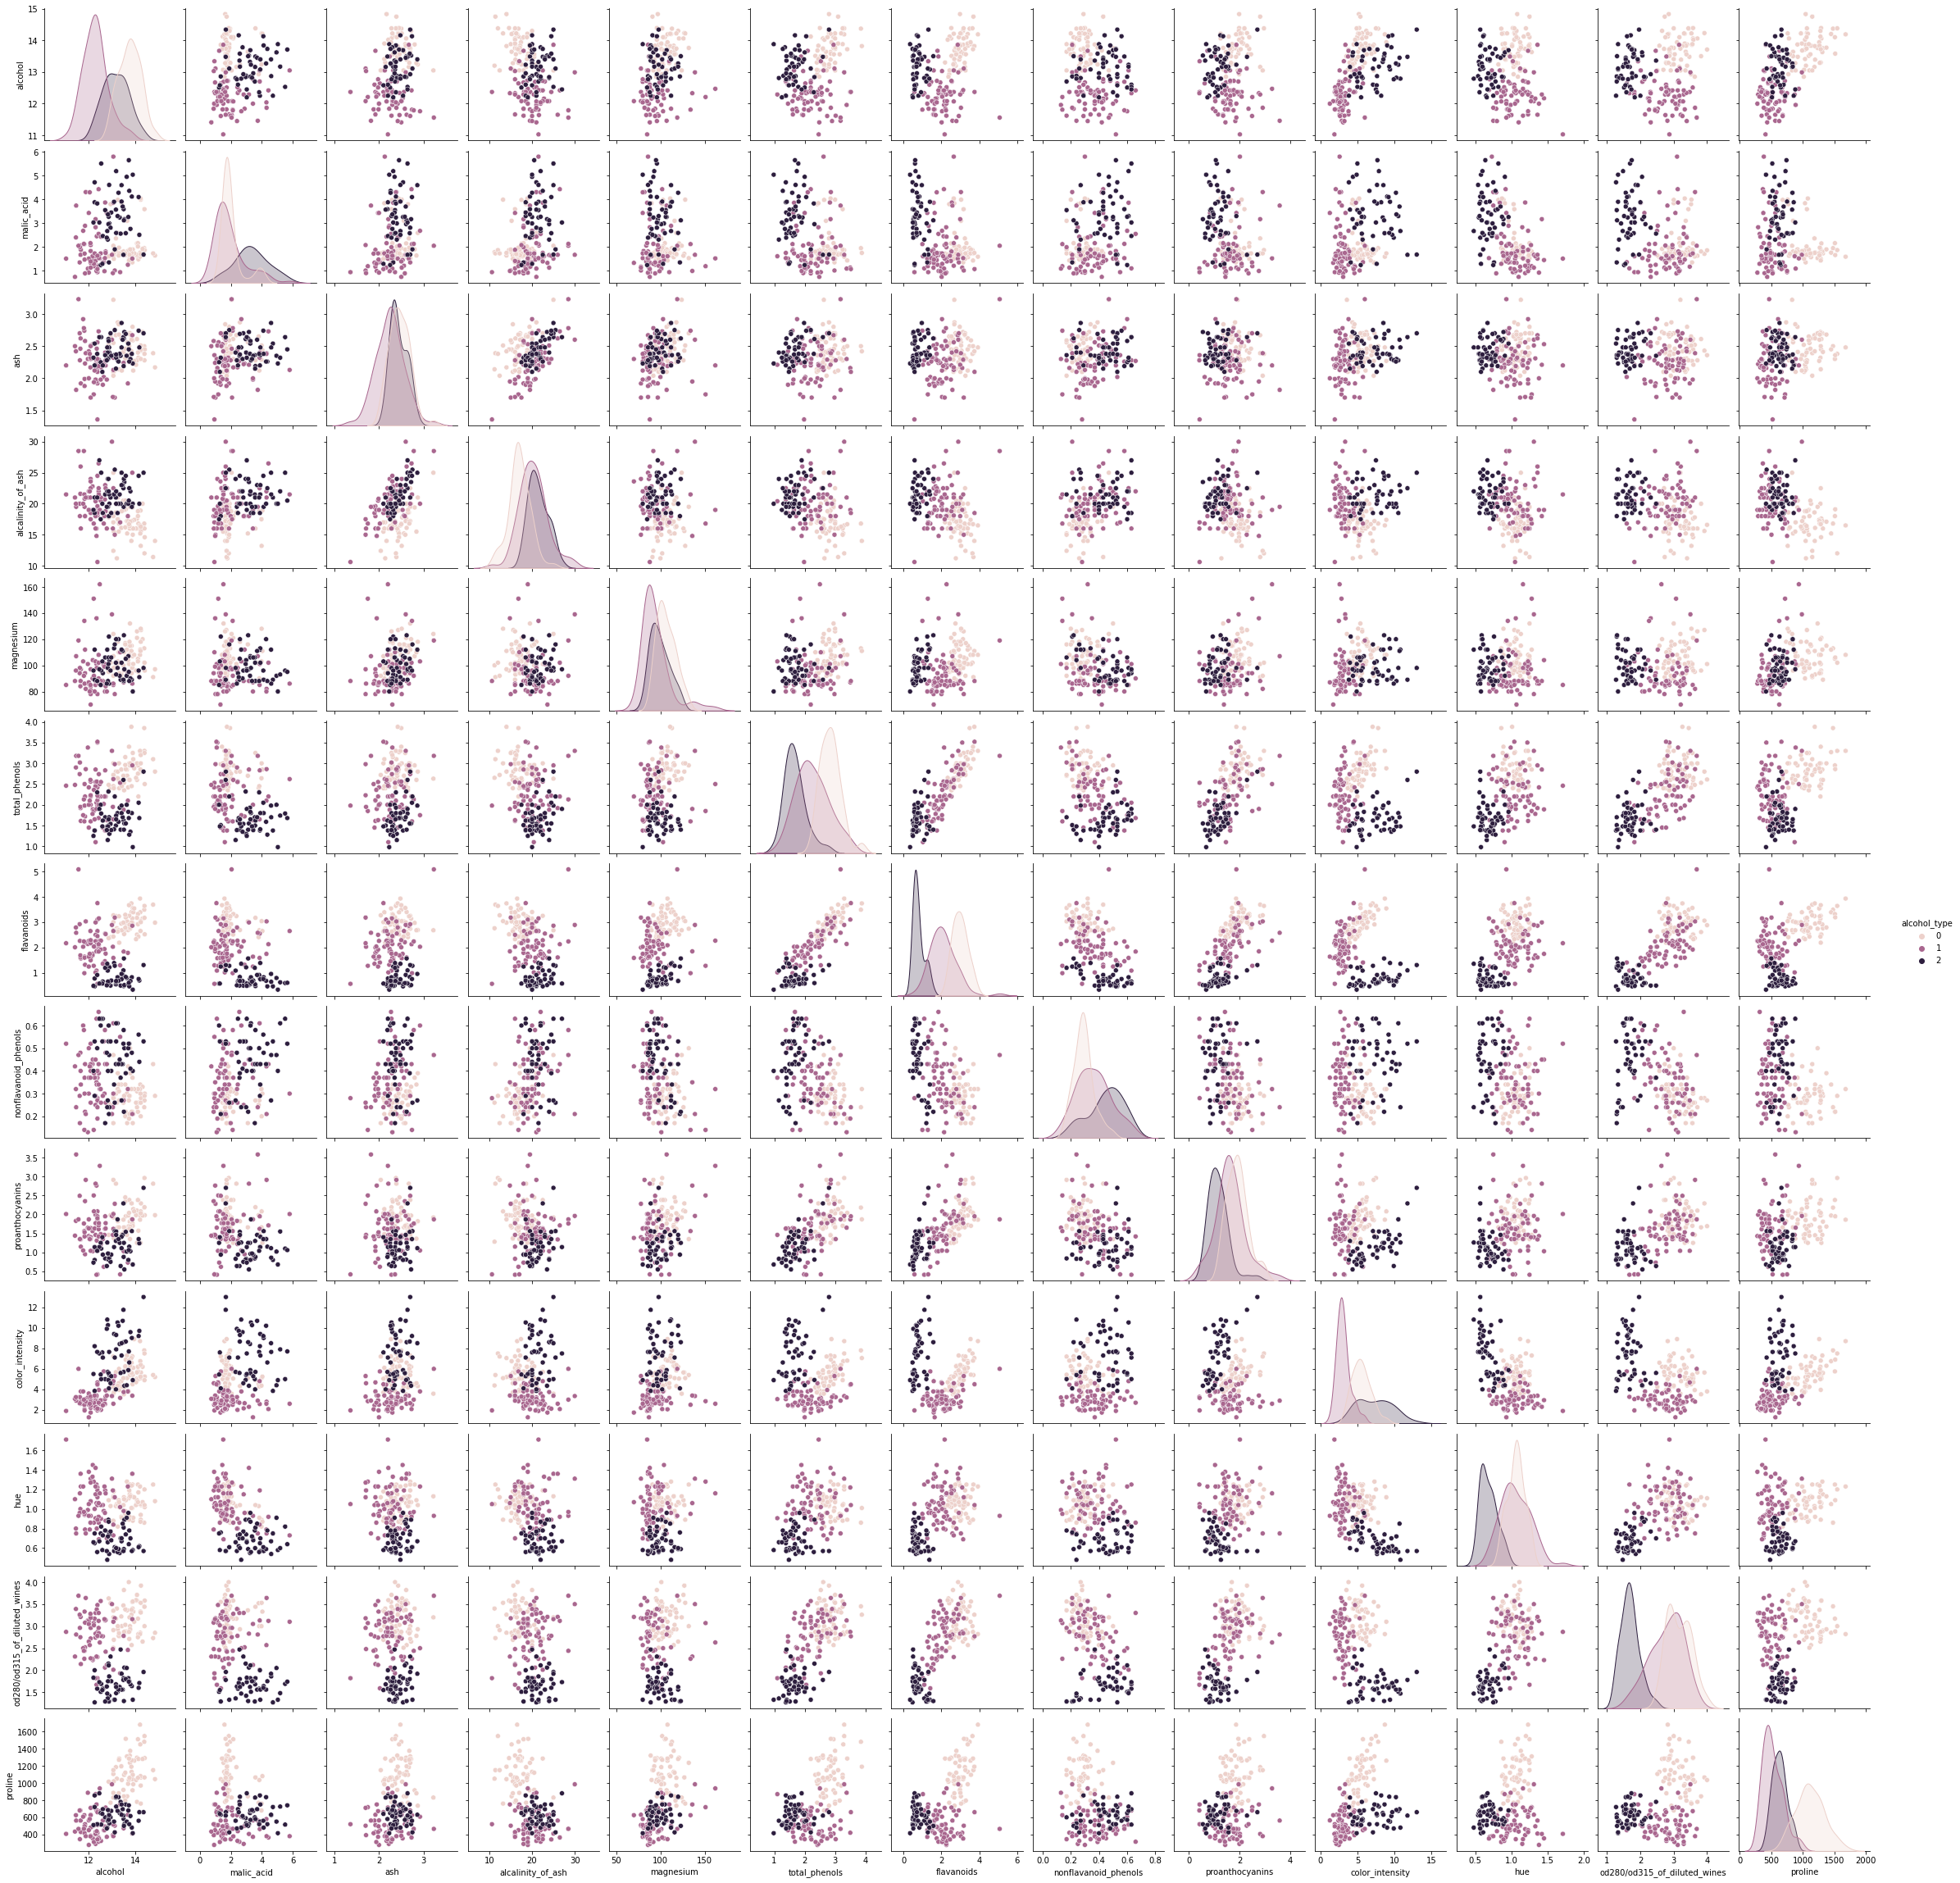

In [27]:
sns.pairplot(wine_df, hue = 'alcohol_type')

In [92]:
#PCA
from sklearn.decomposition import PCA 
pca_wine = PCA(n_components = 5)

In [93]:
pca_w = pca_wine.fit_transform(data_wine)

Text(0, 0.5, 'PC2')

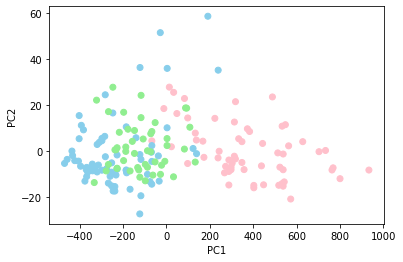

In [94]:
plt.scatter(pca_w[:,0], pca_w[:,1], c = color_list)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
pca_wine.components_    #need to scale the data to have better idea of feature with maximum variation

In [80]:
#tSNE
from sklearn.manifold import TSNE
tsne_main = TSNE(n_components=2,  perplexity=30, init = 'random')

/Users/kinam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


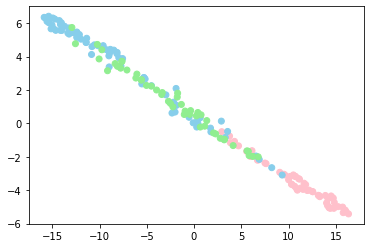

In [95]:
tsne_full = tsne_main.fit_transform(pca_w)
plt.scatter(tsne_full[:,0], tsne_full[:,1], c = color_list)

In [62]:
### Subsetting features based on maximum variation

In [59]:
wine_df_subset = wine_df[["alcohol", "proline", "od280/od315_of_diluted_wines"]]

In [60]:
wine_df_subset.head()

,alcohol,proline,od280/od315_of_diluted_wines
0,14.23,1065.0,3.92
1,13.20,1050.0,3.40
2,13.16,1185.0,3.17
3,14.37,1480.0,3.45
4,13.24,735.0,2.93


In [51]:
data_wine_subset = wine_df_subset.to_numpy()

In [52]:
type(data_wine_subset)

numpy.ndarray

In [53]:
pca_w_sub = pca_wine.fit_transform(data_wine_subset)

Text(0, 0.5, 'PC2')

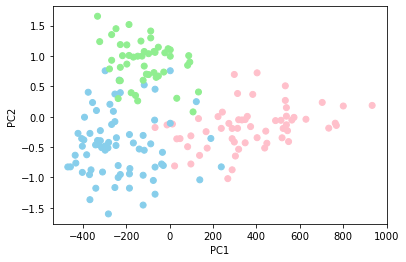

In [54]:
plt.scatter(pca_w_sub[:,0], pca_w_sub[:,1], c = color_list)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [98]:
#tSNE
from sklearn.manifold import TSNE
tsne_sub = TSNE(n_components=2,  perplexity=50, init = 'random')

/Users/kinam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


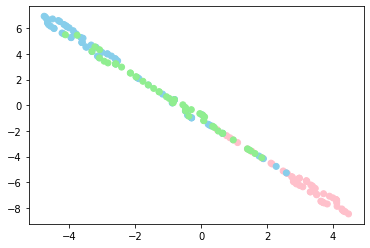

In [99]:
tsne_subset = tsne_sub.fit_transform(data_wine_subset)
plt.scatter(tsne_subset[:,0], tsne_subset[:,1], c = color_list)

In [ ]:
### Subsetting features based on maximum variation (2)

In [63]:
wine_df_subset_2 = wine_df[["alcohol", "od280/od315_of_diluted_wines"]]

In [64]:
wine_df_subset_2.head()

,alcohol,od280/od315_of_diluted_wines
0,14.23,3.92
1,13.20,3.40
2,13.16,3.17
3,14.37,3.45
4,13.24,2.93


In [65]:
data_wine_subset_2 = wine_df_subset_2.to_numpy()

In [66]:
pca_w_sub_2 = pca_wine.fit_transform(data_wine_subset_2)

Text(0, 0.5, 'PC2')

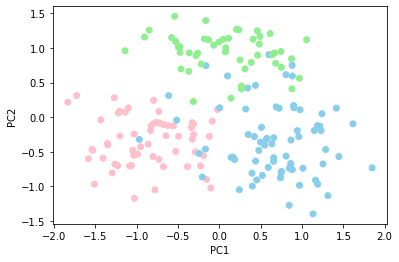

In [67]:
plt.scatter(pca_w_sub_2[:,0], pca_w_sub_2[:,1], c = color_list)
plt.xlabel("PC1")
plt.ylabel("PC2")